<img src="header.png" align="left"/>

# Exercise Classification of IRIS flowers (10 points)

The goal of the exercise is to estimate the species of an iris flower using 4 features. For this we use 
different classification methods.
We use a data set by Edgar Anderson or R. Fischer from 1936 [1][2]. The dataset contains 150 samples, each with
4 measured values petal length, petal width, sepal length, sepal width as features and the correct class as label.  

```
[1] Edgar Anderson (1936). "The species problem in Iris". Annals of the Missouri Botanical Garden. 23 (3): 457–509. doi:10.2307/2394164. JSTOR 2394164.
[2] R. A. Fisher, “The use of multiple measurements in taxonomic problems,” Ann. Eugen., vol. 7, no. 2, pp. 179–188, 1936.
```

**NOTE**

Document your results by simply adding a markdown cell or a python cell (as comment) and writing your statements into this cell. For some tasks the result cell is already available.


In [1]:
import pandas
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=Warning)
plt.rcParams['figure.figsize'] = [16, 9]

# Loading and checking data

In [3]:
# 
# Load data
# 
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pandas.read_csv('data/iris/iris.csv', names=names)

In [4]:
#
# Basic data check
#
print(df.head())

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [5]:
#
# Check the distribution of the classes
# Task: implement your own code to print the distribution of classes in this dataset (1 point)
#

# your code here

&lt;AxesSubplot:xlabel=&#39;class&#39;&gt;

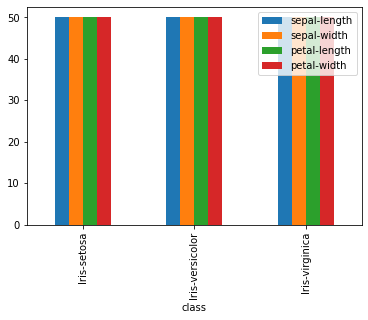

In [6]:
df.groupby('class').count().plot(kind='bar', figsize=(6,4))

In [7]:
# 
# Separate the dataset into training data and test data
#
array = df.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.30
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=42)

# Task: search the internet for the description of the train_test_split function (2 points)
# and describe the parameters
# change the split to 70% training data and 30% test data


Signature: train_test_split(*arrays, **options)
 
train_test_split creates random subsets from data for training and testing.

    + *arrays a list, numpy array, pandas dataframe or similar to create the subsets out of.abs
    + test_size: float, int or None - the propotion of the validation set to include during training
    + train_size: float, int, or None - the absolute numer of train samples
    + random_state: used for selecting/indexing the subsets


In [8]:
#
# Train a simple classifier using the kNN method
#
knn_classifier = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(metric=&#39;euclidean&#39;)

In [9]:
#
# Calculate the accuracy of the trained model
#
predictions = knn_classifier.predict(X_validation)
print('Accuracy: {}'.format(accuracy_score(Y_validation, predictions)))
#
# Task: search the internet for a concise description of the accuracy quality measure. (1 point)

Accuracy: 1.0


In [10]:
#
# Print a confusion matrix
#
# Task: search the internet for a description of the confusion matrix and write it down here. (1 point)
print(confusion_matrix(Y_validation, predictions))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


## Quality measures and Metrics

Once we have developed a model that its valid and robust against unseen data. For that we can use scikit-learn (or _sklearn_). It has a lot of built in functions \[1\] which can be used for **classification metrics** (i.e. what is the relation between correct and the total numer of predictions), **multilabel ranking metrics** (i.e. which label sets are applicable), **regression metrics** (i.e. how well is the prediction of continuous values), and **clustering metrics** (i.e. are the extracted categories similar to ground truth). 

The _accuracy_score_ function is one example of a clasifcation metric. If $ŷ_i$ is the predicted value of the $i$-th sample and $y_i$ is the corresponding true value, then the fraction of correct predictions $n_\mathrm{samples}$ over is defined as $accuracy(y, ŷ) = \frac{1}{n_\mathrm{samples}} \times \sum_{i=0}^{n_\mathrm{samples}-1}1(ŷ_i = y_i)$. The issue with using classification accuracy by itself is that is requires a balanced distribution of classes, or in simpler words, an equal amount of each class. 

Two new parameters are introduced
+ Precision: accuracy of ture positives ($\frac{TP}{TP+FP}$)
+ Recall: ratio of positive instances that are correctly classified ($\frac{TP}{TP+FN}$)

A **confusion matrix** is a clean and unambigious way to present the predicted result. For a binary classification problem the table has 2 rows and 2 columns. Across the top is the observed class labels and down the side are the predicted class labels. Each cell contains the number of predictions made by the classifier that fall into that cell.



Links:

+ \[1\] https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/
+ \[2\] https://scikit-learn.org/stable/modules/model_evaluation.html
+ \[3\] https://towardsdatascience.com/accuracy-is-not-enough-for-classification-task-47fca7d6a8ec


# Test of a second method

In [11]:
#
# Train another classifier using the decision tree method
# 
# Task: implement a decision tree classifier for the IRIS dataset (2 points)
# test with accuracy_score using Y_validation
#

# your code here
tree_classifier = DecisionTreeClassifier(max_depth = 5).fit(X_train, Y_train)

In [12]:
#
# Calculate accuracy
#
predictions = tree_classifier.predict(X_validation)
print('Accuracy: {}'.format(accuracy_score(Y_validation, predictions)))

Accuracy: 1.0


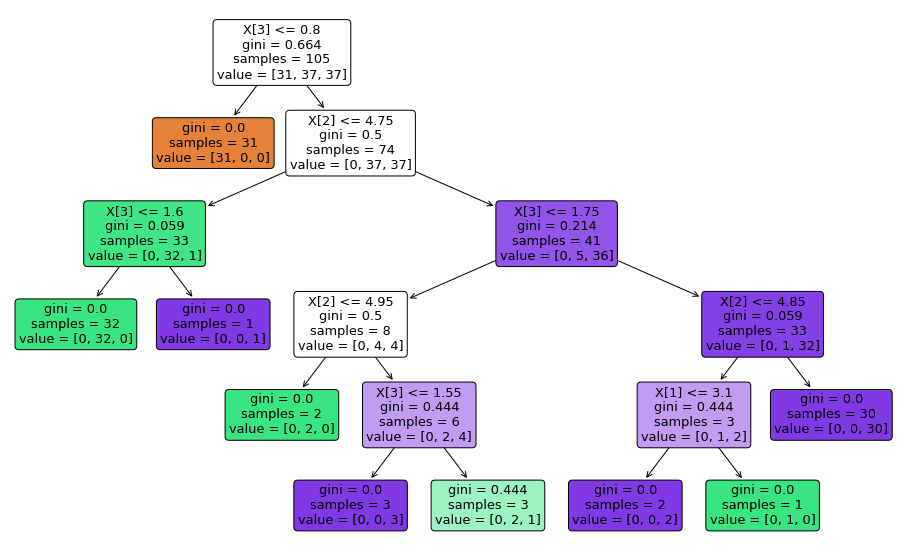

In [13]:
from sklearn.tree import plot_tree

# Prepare a plot figure with set size
plt.figure(figsize = (16,10))
# Plot the decision tree.
plot_tree(tree_classifier,rounded = True, filled = True)
# Display the tree plot figure.
plt.show()

# Test of multiple methods at the same time

In [14]:
scoring = 'accuracy'

models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=42,shuffle=True)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("Modell {}: accuracy {:.3f} (deviation {:.3f})".format(name, cv_results.mean(), cv_results.std()))

Modell KNN: accuracy 0.973 (deviation 0.025)
Modell CART: accuracy 0.953 (deviation 0.027)
Modell NB: accuracy 0.960 (deviation 0.025)
Modell SVM: accuracy 0.973 (deviation 0.025)


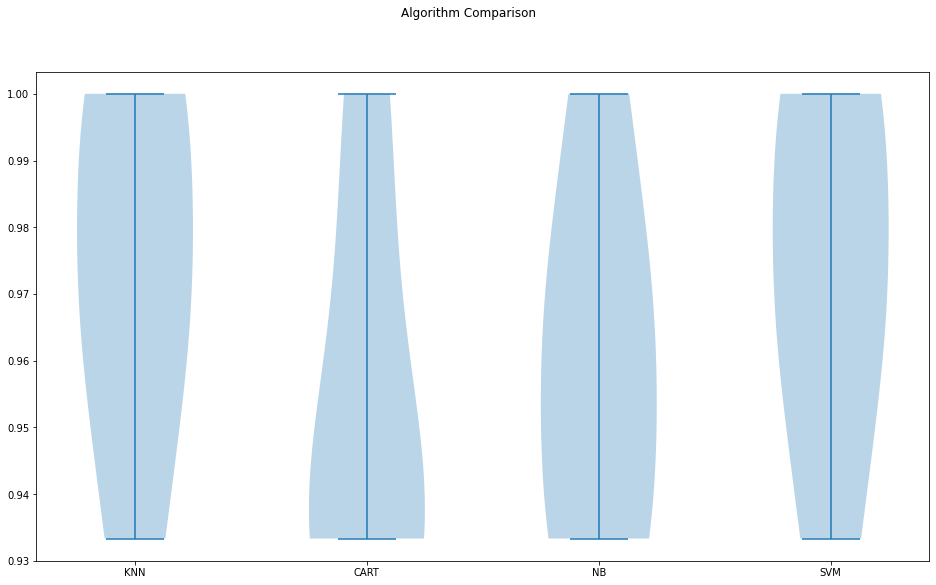

In [15]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
positions = range(len(names))
ax.set_xticks(np.arange(0, len(names)))
plt.violinplot(results,positions)
ax.set_xticklabels(names)
plt.show()

# Optimizing one method with hyperparameter optimization

The idea of hyperparameter optimization is to test several variations of hyperparameters and select those parameters which produce the best quality (accuracy).

In [16]:
# Task: implement a hyperparameter search for the hyperparameter n_neighbors 
# of the KNeighborsClassifier and document the best result. (3 points)

In [17]:
scoring = 'accuracy'

In [18]:
results = []
parameters = []

# your code here
knn = KNeighborsClassifier(n_neighbors=5)

# An eficient solution to tuning the parameters is using GridSearchCV in sklear
from sklearn.model_selection import GridSearchCV

# define the parameter values that should be searched
parameters = list(range(1, 31))

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=parameters)

# Grid object to do 10-fold cross validation on a KNN model using classification accuracy as the evaluation metric In addition, there is a parameter grid to repeat the 10-fold cross validation process 30 times
grid = GridSearchCV(knn, param_grid, cv=10, scoring=scoring)


In [19]:
# train 
grid.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={&#39;n_neighbors&#39;: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring=&#39;accuracy&#39;)

In [20]:
# view the complete results 
grid.cv_results_

{&#39;mean_fit_time&#39;: array([0.00050983, 0.0004689 , 0.00041552, 0.0003962 , 0.00041652,
        0.00039093, 0.00042462, 0.00042419, 0.00036275, 0.00034783,
        0.00037427, 0.00034099, 0.00034778, 0.00034835, 0.00034564,
        0.00033994, 0.00034592, 0.00039363, 0.00039575, 0.00035291,
        0.00034058, 0.00034666, 0.00041347, 0.00035086, 0.00034101,
        0.00034146, 0.0003417 , 0.00034773, 0.0003406 , 0.00034058]),
 &#39;std_fit_time&#39;: array([1.39062189e-04, 1.24326365e-04, 5.80017867e-05, 3.38456650e-05,
        2.15222130e-05, 1.89287085e-05, 9.07431887e-05, 5.23459705e-05,
        2.70787778e-05, 1.66996685e-05, 3.22577430e-05, 4.28596771e-06,
        1.08180312e-05, 1.17815693e-05, 1.11777638e-05, 3.63273563e-06,
        1.05041988e-05, 8.38161185e-05, 2.73985274e-05, 1.24114218e-05,
        3.08519537e-06, 1.35852572e-05, 6.06907875e-05, 2.45337699e-05,
        1.31485415e-05, 5.92392210e-06, 1.08609019e-05, 2.13182076e-05,
        9.38666996e-06, 8.83902919e-0

In [38]:
# get results as list
results = [i for i in grid.cv_results_.get('mean_test_score')]

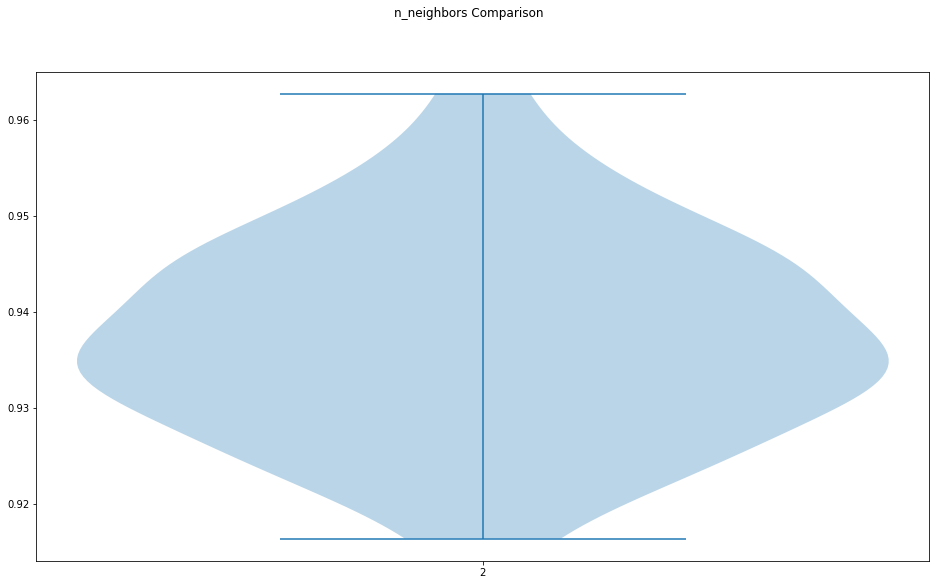

In [40]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('n_neighbors Comparison')
ax = fig.add_subplot(111)
positions = range(len(parameters))
ax.set_xticks(np.arange(0, len(parameters)))
ax.set_xticklabels(parameters)
plt.violinplot(results)
plt.show()

Since the diagram does not work for reason, we can use the following method to determine the best params.

In [168]:
grid.best_params_

{&#39;n_neighbors&#39;: 11}

In [27]:
grid.best_score_

0.9627272727272727